# Present Day Areas

This notebook (Python 3) assesses the present day areas of large igneous provinces (LIPs) and builds up the LIP summary table used in the manuscript.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

## Data Files

In [2]:
original = pd.read_csv('../Data/LIP_Outline.csv')
original.sort_values('AGE',inplace=True)
original.reset_index(inplace=True,drop=True)

In [3]:
present = pd.read_csv('../Data/LIP_current_extent.csv')
present.sort_values('X_BARCDAGE',inplace=True)
present.reset_index(inplace=True,drop=True)

## LIPs

Start a dataframe:

In [4]:
summary = pd.DataFrame(columns=['name',
                                'type',
                                'age',
                                'age ref.',
                                'original area km2',
                                'present area km2',
                                'present area ref.',
                                'present/original',
                                'buried'])

Template to add rows to the summary dataframe:

### Columbia River Basalts

Present extent shapefile has data from both Buchan and Ernst (2004) as well as the PLATES database - we chose to use the Buchan and Ernst (2004) (which has `['CAPT_SCALE']==2000000`) since they had more detail and included the Eastern Snake River Plain which is included in the original broad LIP outline.

In [5]:
original_CRB = original[original['NAME_EVENT']=='Columbia River']
present_CRB = present[(present['X_BARCDAGE']==17)&(present['CAPT_SCALE']==2000000)]

In [6]:
summary.loc['CRB'] = \
    pd.Series({'name':'Columbia River',
               'type':'basaltic',
               'age':16.3,
               'age ref.':'Kasbohm and Schoene (2018)',
               'original area km2':np.sum(original_CRB['area_km2']),
               'present area km2':np.sum(present_CRB['area_km2']),
               'present area ref.':'Buchan and Ernst (2004)',
               'present/original':np.sum(present_CRB['area_km2']) / np.sum(original_CRB['area_km2']),
               'buried':'no'})

### Afar

The present-day extent for the Afar LIP is from the PLATES database:

> Coffin, M.F., Duncan, R.A., Eldholm, O., Fitton, J.G., Frey, F.A., Larsen, H.C., Mahoney, J.J., Saunders, A.D., Schlich, R., and Wallace, P.J., 2006. Large igneous provinces and scientific ocean drilling: Status quo and a look ahead, Oceanography, vol. 19(4), pp. 150-160.

The original extent polygon extends much further north than the exposure of the Ethiopian Traps and includes the Red Sea and its flanks where there are no current exposures included in the PLATES polygons — despite there being some exposure of LIP-related volcanics along the Red Sea flanks. This portion of the LIP could be considered to be buried with the Ethiopian and Yemen plateau volcanics being exposed.

In [7]:
original_Afar = original[original['NAME_EVENT']=='Afro-Arabian']
present_Afar = present[present['X_BARCDAGE']==30]

In [8]:
summary.loc['Afar'] = \
    pd.Series({'name':'Afar',
               'type':'basaltic',
               'age':30,
               'age ref.':'Courtillot and Renne (2003)',
               'original area km2':np.sum(original_Afar['area_km2']),
               'present area km2':np.sum(present_Afar['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':np.sum(present_Afar['area_km2']) / np.sum(original_Afar['area_km2']),
               'buried':'partial'})

### Sierra Madre Occidental

The Sierra Madre Occidental is a silic large igneous province, but along with the rhyolitic volcanics there was mafic and intermediate volcanism. The first major pulse of magmatism was 34 Ma (Bryan and Ferrari, 2013).

### NAIP (North Atlantic Volcanic Province)

The North Atlantic Volcanic Province was associated with succesful rifting. In the Ernst current extent database there were duplicates for nearly all of the polygons with ages assigned both at 62 Ma and 60 Ma. There were also abundant polygons that are within the North Atlantic and are not exposed. These duplicates and submerged polygons were removes in order to determine area. Its extent will be anomalously low due to the potential of coverage by the Greenland ice sheet including the burial of much of it due to successful rifting.

> Larsen, L., Pedersen, A., Tegner, C., Duncan, R., Hald, N. and Larsen, J., 2015. Age of Tertiary volcanic rocks on the West Greenland continental margin: volcanic evolution and event correlation to other parts of the North Atlantic Igneous Province. Geological Magazine: 1-25.

In [9]:
original_NAIP = original[original['AGE']==62]
present_NAIP = present[present['X_BARCDAGE']==62]

In [10]:
summary.loc['NAIP'] = \
    pd.Series({'name':'NAIP',
               'type':'basaltic',
               'age':62,
               'age ref.':'Larsen et al. (2015)',
               'original area km2':np.sum(original_NAIP['area_km2']),
               'present area km2':np.sum(present_NAIP['area_km2']),
               'present area ref.':'Buchan and Ernst (2004), Coffin et al. (2006)',
               'present/original':np.sum(present_NAIP['area_km2']) / np.sum(original_NAIP['area_km2']),
               'buried':'partial'})

### Deccan

In [11]:
original_Deccan = original[original['NAME_PART']=='Deccan']
present_Deccan = present[present['X_BARCDAGE']==65]

In [12]:
summary.loc['Deccan'] = \
    pd.Series({'name':'Deccan',
               'type':'basaltic',
               'age':66,
               'age ref.':'Schoene et al. (2014)',
               'original area km2':np.sum(original_Deccan['area_km2']),
               'present area km2':np.sum(present_Deccan['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':np.sum(present_Deccan['area_km2']) / np.sum(original_Deccan['area_km2']),
               'buried':'no'})

### Seychelles

In [13]:
original_Seychelles = original[original['NAME_PART']=='Chagos-Laccadive (3000M & gravity contour)']

In [14]:
summary.loc['Seychelles'] = \
    pd.Series({'name':'Seychelles',
               'type':'basaltic',
               'age':66,
               'age ref.':'Schoene et al. (2014)',
               'original area km2':np.sum(original_Seychelles['area_km2']),
               'present area km2':0,
               'present area ref.':'Coffin et al. (2006)',
               'present/original':0,
               'buried':'yes'})

### Madagascar

In [15]:
original_Madagascar = original[original['NAME_EVENT']=='Madagascar']
present_Madagascar = present[present['X_BARCDAGE']==91]

In [16]:
summary.loc['Madagascar'] = \
    pd.Series({'name':'Madagascar',
               'type':'basaltic',
               'age':90,
               'age ref.':'Cucciniello (2010)',
               'original area km2':np.sum(original_Madagascar['area_km2']),
               'present area km2':np.sum(present_Madagascar['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':np.sum(present_Madagascar['area_km2']) / np.sum(original_Madagascar['area_km2']),
               'buried':'no'})

### Caribbean-Colombian

In [17]:
original_Caribbean_Colombian = original[original['NAME_EVENT']=='Caribbean-Colombian']
present_Caribbean_Colombian = present[present['X_BARCDAGE']==88]

In [18]:
summary.loc['Caribbean_Colombian'] = \
    pd.Series({'name':'Caribbean-Colombian',
               'type':'basaltic',
               'age':94,
               'age ref.':'Loewen et al. (2013)',
               'original area km2':np.sum(original_Caribbean_Colombian['area_km2']),
               'present area km2':np.sum(present_Caribbean_Colombian['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':np.sum(present_Caribbean_Colombian['area_km2']) / np.sum(original_Caribbean_Colombian['area_km2']),
               'buried':'no'})

### High Arctic

Used LiMW to get the present day area - basaltic polygons corresponding to the HALIP.

In [19]:
original_HALIP = original[original['AGE_TEXT']=='120-90 Ma']
present_HALIP = pd.read_csv('../Data/HALIP_extent.csv')

In [20]:
summary.loc['HALIP'] = \
    pd.Series({'name':'HALIP',
               'type':'basaltic',
               'age':95,
               'age ref.':'Kingsbury et al. (2018)',
               'original area km2':np.sum(original_HALIP['area_km2']),
               'present area km2':np.sum(present_HALIP['area_km2']),
               'present area ref.':'Moosdorf and Hartmann (2015)',
               'present/original':np.sum(present_HALIP['area_km2']) / np.sum(original_HALIP['area_km2']),
               'buried':'no'})

### Whitsunday

Not pulling present day area since silicic.

### Maud Rise

Does not intersect the CEED6 polygons.

### Comei

Original area manually georeferenced from Ernst et al. (2017).

No current compilation of present day exposure.

In [21]:
original_Comei = original[original['NAME_EVENT']=='Comei']

In [22]:
summary.loc['Comei'] = \
    pd.Series({'name':'Comei',
               'type':'basaltic',
               'age':132,
               'age ref.':'Zhu et al. (2009)',
               'original area km2':np.sum(original_Comei['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Bunbury

Original area manually georeferenced from Ernst et al. (2017).

In [23]:
original_Bunbury = original[original['NAME_EVENT']=='Bunbury']
present_Bunbury = present[(present['X_NAME_EVE']=='Bunbury')&(present['X_NAME_UNI']=='Bunbury Basalt')]

In [24]:
summary.loc['Bunbury'] = \
    pd.Series({'name':'Bunbury',
               'type':'basaltic',
               'age':132,
               'age ref.':'Zhu et al. (2009)',
               'original area km2':np.sum(original_Bunbury['area_km2']),
               'present area km2':np.sum(present_Bunbury['area_km2']),
               'present area ref.':'Thorne et al. (2014)',
               'present/original':np.sum(present_Bunbury['area_km2']) / np.sum(original_Bunbury['area_km2']),
               'buried':'no'})

### EQUAMP

In [25]:
original_EQUAMP = original[original['NAME_EVENT']=='EQUAMP (Equatorial Atlantic Magmatic Province)']
present_EQUAMP = present[(present['X_NAME_EVE']=='130 Ma (EQUAMP)')|(present['X_NAME_EVE']=='EQUAMP (Equatorial Atlantic Magmatic Province)')]

In [26]:
summary.loc['EQUAMP'] = \
    pd.Series({'name':'EQUAMP',
               'type':'basaltic',
               'age':131,
               'age ref.':'Hollanda et al. (2016)',
               'original area km2':np.sum(original_EQUAMP['area_km2']),
               'present area km2':np.sum(present_EQUAMP['area_km2']),
               'present area ref.':'Hollanda et al. (2016)',
               'present/original':np.sum(present_EQUAMP['area_km2']) / np.sum(original_EQUAMP['area_km2']),
               'buried':'no'})

### Parana-Etendeka

In [27]:
original_Parana_Etendeka = original[(original['AGE']==134)&(original['NAME_EVENT']!='EQUAMP (Equatorial Atlantic Magmatic Province)')]
present_Parana = present[(present['X_BARCDAGE']==134)&(present['X_NAME_EVE']!='130 Ma (EQUAMP)')&(present['X_NAME_EVE']!='EQUAMP (Equatorial Atlantic Magmatic Province)')]
present_Etendeka = present[present['X_BARCDAGE']==138]

In [28]:
summary.loc['Parana_Etendeka'] = \
    pd.Series({'name':'Parana-Etendeka',
               'type':'basaltic',
               'age':135,
               'age ref.':'Florisbal et al. (2014)',
               'original area km2':np.sum(original_Parana_Etendeka['area_km2']),
               'present area km2':np.sum(present_Parana['area_km2'])+np.sum(present_Etendeka['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':(np.sum(present_Parana['area_km2'])+np.sum(present_Etendeka['area_km2'])) / np.sum(original_Parana_Etendeka['area_km2']),
               'buried':'partial'})

### Trap

The only exposure of the Trap are dikes (no flood basalts).

In [29]:
original_Trap = original[original['NAME_EVENT']=='Trap']

In [30]:
summary.loc['Trap'] = \
    pd.Series({'name':'Trap',
               'type':'basaltic',
               'age':140,
               'age ref.':'Ernst and Buchan (2001)',
               'original area km2':np.sum(original_Trap['area_km2']),
               'present area km2':0,
               'present area ref.':'Ernst and Buchan (2001)',
               'present/original':0,
               'buried':'no'})

### Sorachi

Not included since it is an accreted oceanic plateau.

### NW Australia Margin

There are offshore intrusions and basalts, but no current exposure on land.

In [31]:
original_NW_Aus = original[original['NAME_EVENT']=='NW Australian Margin']

In [32]:
summary.loc['NW_Aus'] = \
    pd.Series({'name':'NW Australia Margin',
               'type':'basaltic',
               'age':160,
               'age ref.':'Pirajno and Hoatson (2012)',
               'original area km2':np.sum(original_NW_Aus['area_km2']),
               'present area km2':0,
               'present area ref.':'Coffin et al. (2006)',
               'present/original':0,
               'buried':'yes'})

### Chon Aike

Original area manually georeferenced from Ernst et al. (2017).

No current compilation of present day exposure.

### Karoo

Present day area includes both volcanics and sills.

In [33]:
original_Karoo = original[original['NAME_EVENT']=='Karoo']
present_Karoo = present[present['REF_LINE']=='from ArcGIS compilation produced under LIPs Project contract to M. de Kock']
present_Karoo = present_Karoo[present_Karoo['X_NAME_EVE']=='Karoo LIP']

In [34]:
summary.loc['Karoo'] = \
    pd.Series({'name':'Karoo',
               'type':'basaltic',
               'age':183,
               'age ref.':'Burgess et al. (2015)',
               'original area km2':np.sum(original_Karoo['area_km2']),
               'present area km2':np.sum(present_Karoo['area_km2']),
               'present area ref.':'de Kock compilation',
               'present/original':np.sum(present_Karoo['area_km2']) / np.sum(original_Karoo['area_km2']),
               'buried':'no'})

### Ferrar

No current compilation of present day exposure.

In [35]:
original_Ferrar = original[original['NAME_EVENT']=='Ferrar']

In [36]:
summary.loc['Ferrar'] = \
    pd.Series({'name':'Ferrar',
               'type':'basaltic',
               'age':183,
               'age ref.':'Burgess et al. (2015)',
               'original area km2':np.sum(original_Ferrar['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Angayucham

Not included since it is an accreted oceanic plateau.

### Wrangellia

Not included since it is an accreted oceanic plateau.

### CAMP

Present day extent includes lavas and sills.

In [37]:
original_CAMP = original[original['AGE']==201]
present_CAMP = present[present['REF_LINE']=='from ArcGIS CAMP compilation of A. Marzoli & L. Parisio produced under contract to LIPs-Reconstruction Project']

In [38]:
summary.loc['CAMP'] = \
    pd.Series({'name':'CAMP',
               'type':'basaltic',
               'age':201,
               'age ref.':'Blackburn et al. (2013)',
               'original area km2':np.sum(original_CAMP['area_km2']),
               'present area km2':np.sum(present_CAMP['area_km2']),
               'present area ref.':'Marzoli and Parisio compilation',
               'present/original':np.sum(present_CAMP['area_km2']) / np.sum(original_CAMP['area_km2']),
               'buried':'partial'})

### Siberia

We are using the PLATES compilation for now, but we could perhaps do a better job using LiMW.

In [39]:
original_Siberia = original[original['NAME_EVENT']=='Siberian Trap LIP']
present_Siberia = present[present['X_NAME_EVE']=='Siberian Trap LIP']
present_Siberia = present_Siberia[present_Siberia['REF_LINE']=='http://www.ig.utexas.edu/research/projects/plates/data/LIPS/Data/About.Data   M.F. Coffin, U. Texas']

In [40]:
summary.loc['Siberia'] = \
    pd.Series({'name':'Siberia',
               'type':'basaltic',
               'age':252,
               'age ref.':'Burgess and Bowring (2015)',
               'original area km2':np.sum(original_Siberia['area_km2']),
               'present area km2':np.sum(present_Siberia['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':np.sum(present_Siberia['area_km2']) / np.sum(original_Siberia['area_km2']),
               'buried':'no'})

### Emeishan

Present day polygons are slightly low resolution, which may be artificially increasing their area.

In [41]:
original_Emeishan = original[original['NAME_EVENT']=='Emeishan']
present_Emeishan = present[present['X_LIPNAME']=='Emeishan basaltic volcanics']

In [42]:
summary.loc['Emeishan'] = \
    pd.Series({'name':'Emeishan',
               'type':'basaltic',
               'age':259,
               'age ref.':'Zhou et al. (2002)',
               'original area km2':np.sum(original_Emeishan['area_km2']),
               'present area km2':np.sum(present_Emeishan['area_km2']),
               'present area ref.':'Coffin et al. (2006)',
               'present/original':np.sum(present_Emeishan['area_km2']) / np.sum(original_Emeishan['area_km2']),
               'buried':'no'})

### Tarim

No current compilation of present day exposure.

In [43]:
original_Tarim = original[(original['NAME_EVENT']=='Tarim (possibly incorrectly located)')|(original['NAME_EVENT']=='Tarim')]

In [44]:
summary.loc['Tarim'] = \
    pd.Series({'name':'Tarim',
               'type':'basaltic',
               'age':290,
               'age ref.':'Xu et al. (2014)',
               'original area km2':np.sum(original_Tarim['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Panjal-Qiangtang

No current compilation of present day exposure.

In [45]:
original_Panjal_Qiangtang = original[(original['NAME_EVENT']=='Panjal')|(original['NAME_EVENT']=='South Qiangtang')]

In [46]:
summary.loc['Panjal_Qiangtang'] = \
    pd.Series({'name':'Panjal-Qiangtang',
               'type':'basaltic',
               'age':283,
               'age ref.':'Zhai et al. (2013)',
               'original area km2':np.sum(original_Panjal_Qiangtang['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Kennedy-Conners-Auburn

Original area manually georeferenced from Ernst et al. (2017).

No current compilation of present day exposure.

### Magdalen

No current compilation of present day exposure.

In [47]:
original_Magdalen = original[original['NAME_EVENT']=='Magdalen-Maritimes']

In [48]:
summary.loc['Magdalen'] = \
    pd.Series({'name':'Magdalen',
               'type':'basaltic',
               'age':360,
               'age ref.':'Brendan Murphy et al. (1999)',
               'original area km2':np.sum(original_Magdalen['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Vilyui

No current compilation of present day exposure.

In [49]:
original_Vilyui = original[original['NAME_EVENT']=='Yakutsk-Vilyui']

In [50]:
summary.loc['Vilyui'] = \
    pd.Series({'name':'Vilyui',
               'type':'basaltic',
               'age':374,
               'age ref.':'Ricci et al. (2013)',
               'original area km2':np.sum(original_Vilyui['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Kola-Dnieper

No current compilation of present day exposure.

In [51]:
original_Kola_Dnieper = original[original['NAME_EVENT']=='Kola-Dnieper [East European craton]']

In [52]:
summary.loc['Kola_Dnieper'] = \
    pd.Series({'name':'Kola-Dnieper',
               'type':'basaltic',
               'age':380,
               'age ref.':'Arzamastsev and Wu (2014)',
               'original area km2':np.sum(original_Kola_Dnieper['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Suordakh

Original area manually georeferenced from Ernst et al. (2017).

No current compilation of present day exposure.

In [53]:
original_Suordakh = original[original['NAME_EVENT']=='Suordakh']

In [54]:
summary.loc['Suordakh'] = \
    pd.Series({'name':'Suordakh',
               'type':'basaltic',
               'age':450,
               'age ref.':'Khudoley et al. (2013)',
               'original area km2':np.sum(original_Suordakh['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Kalkarindji

Patchy/incomplete current compilation of present day exposure.

In [55]:
original_Kalkarindji = original[original['NAME_EVENT']=='Kalkarindji']
present_Kalkarindji = present[present['X_NAME_EVE']=='Kalkarindji']

In [56]:
summary.loc['Kalkarindji'] = \
    pd.Series({'name':'Kalkarindji',
               'type':'basaltic',
               'age':511,
               'age ref.':'Jourdan et al. (2014)',
               'original area km2':np.sum(original_Kalkarindji['area_km2']),
               'present area km2':np.sum(present_Kalkarindji['area_km2']),
               'present area ref.':'Thorne et al. (2014)',
               'present/original':np.sum(present_Kalkarindji['area_km2']) / np.sum(original_Kalkarindji['area_km2']),
               'buried':'no'})

### Wichita

Present day extent not examined.

In [57]:
original_Wichita = original[original['NAME_EVENT']=='Wichita Mountains']

In [58]:
summary.loc['Wichita'] = \
    pd.Series({'name':'Wichita',
               'type':'basaltic',
               'age':535,
               'age ref.':'Hanson et al. (2013)',
               'original area km2':np.sum(original_Wichita['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'yes'})

### Ouarzazate

Present day extent not examined.

### CIMP

Present day extent not examined.

Consists of several parts with different ages.

In [59]:
original_CIMP_A = original[(original['NAME_EVENT']=='Catoctin')|
                           (original['NAME_EVENT']=='Sept-Iles - Catoctin (Late Central-Iapetus)')|
                           (original['NAME_EVENT']=='Grenville-Rideau (Middle Central-Iapetus)')]

In [60]:
summary.loc['CIMP_A'] = \
    pd.Series({'name':'CIMP - A',
               'type':'basaltic',
               'age':580,
               'age ref.':'Ernst and Bell (2010)',
               'original area km2':np.sum(original_CIMP_A['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

In [61]:
original_CIMP_B = original[(original['NAME_EVENT']=='Long Range (Early Central-Iapetus)')|
                           (original['NAME_EVENT']=='Baltoscandian - Egersund')]

In [62]:
summary.loc['CIMP_B'] = \
    pd.Series({'name':'CIMP - B',
               'type':'basaltic',
               'age':615,
               'age ref.':'Ernst and Bell (2010)',
               'original area km2':np.sum(original_CIMP_B['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Franklin

Could be filtered by "DESCRIPT" field to be volcanics - including sills and volcanics right now

In [63]:
original_Franklin = original[original['NAME_EVENT']=='Franklin']
present_Franklin = present[present['X_NAME_EVE']=='Franklin']

In [64]:
summary.loc['Franklin'] = \
    pd.Series({'name':'Franklin',
               'type':'basaltic',
               'age':720,
               'age ref.':'Denyszyn et al. (2009)',
               'original area km2':np.sum(original_Franklin['area_km2']),
               'present area km2':np.sum(present_Franklin['area_km2']),
               'present area ref.':'Buchan and Ernst (2004)',
               'present/original':np.sum(present_Franklin['area_km2']) / np.sum(original_Franklin['area_km2']),
               'buried':'no'})

### Irkutsk

In [65]:
original_Irkutsk = original[original['NAME_EVENT']=='Irkutsk']

In [66]:
summary.loc['Irkutsk'] = \
    pd.Series({'name':'Irkutsk',
               'type':'basaltic',
               'age':724,
               'age ref.':'Ernst et al. (2016)',
               'original area km2':np.sum(original_Irkutsk['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Mundine Well

In [67]:
original_Mundine_Well = original[original['NAME_EVENT']=='Mundine Well']

In [68]:
summary.loc['Mundine_Well'] = \
    pd.Series({'name':'Mundine Well',
               'type':'basaltic',
               'age':755,
               'age ref.':'Wingate and Giddings (2000)',
               'original area km2':np.sum(original_Mundine_Well['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### Gunbarrel

In [69]:
original_Gunbarrel = original[original['NAME_EVENT']=='Gunbarrel (Western North America)']

In [70]:
summary.loc['Gunbarrel'] = \
    pd.Series({'name':'Gunbarrel',
               'type':'basaltic',
               'age':780,
               'age ref.':'Harlan et al. (2003)',
               'original area km2':np.sum(original_Gunbarrel['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

### SWCUC

In [71]:
original_SWCUC = original[original['NAME_EVENT']=='South China events (825-750 Ma)']

In [72]:
summary.loc['SWCUC'] = \
    pd.Series({'name':'SWCUC',
               'type':'basaltic',
               'age':821,
               'age ref.':'Wang et al. (2016)',
               'original area km2':np.sum(original_SWCUC['area_km2']),
               'present area km2':np.nan,
               'present area ref.':'n/a',
               'present/original':np.nan,
               'buried':'no'})

## Analysis

In [73]:
summary.sort_values('age', inplace=True)
summary

,name,type,age,age ref.,original area km2,present area km2,present area ref.,present/original,buried
CRB,Columbia River,basaltic,16.3,Kasbohm and Schoene (2018),6.764210e+05,375545,Buchan and Ernst (2004),0.555194,no
Afar,Afar,basaltic,30.0,Courtillot and Renne (2003),2.046999e+06,631289,Coffin et al. (2006),0.308397,partial
NAIP,NAIP,basaltic,62.0,Larsen et al. (2015),1.071541e+06,291288,"Buchan and Ernst (2004), Coffin et al. (2006)",0.271840,partial
Deccan,Deccan,basaltic,66.0,Schoene et al. (2014),8.311900e+05,561434,Coffin et al. (2006),0.675458,no
Seychelles,Seychelles,basaltic,66.0,Schoene et al. (2014),4.561983e+05,0,Coffin et al. (2006),0.000000,yes
Madagascar,Madagascar,basaltic,90.0,Cucciniello (2010),6.270722e+05,31289,Coffin et al. (2006),0.049897,no
Caribbean_Colombian,Caribbean-Colombian,basaltic,94.0,Loewen et al. (2013),7.122517e+05,126149,Coffin et al. (2006),0.177113,no
HALIP,HALIP,basaltic,95.0,Kingsbury et al. (2018),3.597497e+06,149571,Moosdorf and Hartmann (2015),0.041576,no
EQUAMP,EQUAMP,basaltic,131.0,Hollanda et al. (2016),6.602910e+05,7908,Hollanda et al. (2016),0.011977,no
Comei,Comei,basaltic,132.0,Zhu et al. (2009),1.054453e+05,NaN,n/a,NaN,no


Clean up the dataframe:

In [74]:
# get rid of any rows with NaN's (i.e. those without a present day area constraint)
clean_summary = summary.dropna().copy()

# then remove anything that was buried
clean_summary = clean_summary[clean_summary['buried']=='no'].copy()

# then remove anything that's not basaltic
clean_summary = clean_summary[clean_summary['type']=='basaltic'].copy()

# reset indexes
clean_summary.reset_index(drop=True, inplace=True)

print('n = {}'.format(len(clean_summary)))

n = 13


Plot:

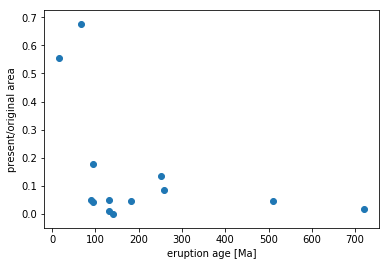

In [75]:
fig, ax = plt.subplots()

ax.scatter(clean_summary['age'], clean_summary['present/original'])
ax.set_xlabel('eruption age [Ma]')
ax.set_ylabel('present/original area')

plt.show(fig)

### Exponential fit to all data

$$
N(t) = N_{0}2^{-t/\tau}
$$

where $\tau$ is the halflife.

In [76]:
# define the exponential function
def func(x, tau):
    return 2**(-x / tau)

Basaltic LIPs:

In [77]:
basaltic = summary.dropna().copy()
basaltic = basaltic[basaltic['type']=='basaltic'].copy()

# fit
popt, pcov = curve_fit(func, basaltic['age'], basaltic['present/original'], p0=35)
predicted_ratios = func(basaltic['age'], *popt)

# compute RMSE
RMSE = np.sqrt(mean_squared_error(basaltic['present/original'], predicted_ratios))

print('tau  = {:.2f}'.format(popt[0]))
print('RMSE = {:.2f}'.format(RMSE))

tau  = 28.95
RMSE = 0.14


Basaltic, unburied LIPs:

In [78]:
# fit
popt, pcov = curve_fit(func, clean_summary['age'], clean_summary['present/original'], p0=35)
predicted_ratios = func(clean_summary['age'], *popt)

# compute RMSE
RMSE = np.sqrt(mean_squared_error(clean_summary['present/original'], predicted_ratios))

print('tau  = {:.2f}'.format(popt[0]))
print('RMSE = {:.2f}'.format(RMSE))

tau  = 36.52
RMSE = 0.14


In [79]:
buried = summary[(summary['type']=='basaltic')&(summary['buried']=='yes')].dropna().copy()
buried.reset_index(drop=True,inplace=True)
partial = summary[(summary['type']=='basaltic')&(summary['buried']=='partial')].dropna().copy()
partial.reset_index(drop=True,inplace=True)

Get percent time in the tropics:

In [80]:
centroids = pd.read_csv('reconstruction_output/centroid_lat_LIPs_df.csv')

tropics_time = np.array([])

for i in range(len(clean_summary.index)):
#for i in range(1,2):
    this_LIP = centroids[centroids['LIP_names']==clean_summary['name'][i]]
    this_row = this_LIP.values[:,2:].astype(np.float64)
    if this_row.ndim == 2:
        this_row = np.mean(this_row, axis=0)
    
    # pull out the non-NaN parts of the row
    this_row = this_row[np.isfinite(this_row)]
    
    # how many elements are in the tropics?
    all_n = len(this_row)
    tropics_n = np.sum(np.abs(this_row)<15)
    
    tropics_time = np.append(tropics_time, tropics_n/all_n)

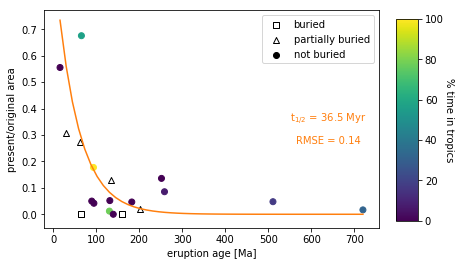

In [81]:
# plot
fig, ax = plt.subplots()

plot_x = np.linspace(np.min(clean_summary['age']), np.max(clean_summary['age']))
plot_y = func(plot_x, *popt)

ax.scatter(buried['age'], buried['present/original'],
           marker='s', edgecolor='k', facecolor='w', label='buried')
ax.scatter(partial['age'], partial['present/original'],
           marker='^', edgecolor='k', facecolor='w', label='partially buried')
scat = ax.scatter(clean_summary['age'], clean_summary['present/original'],
                  marker='o', c=tropics_time, cmap='viridis', label='__nolegend__')
ax.scatter([],[],marker='o',c='k',label='not buried')
ax.plot(plot_x, plot_y, c='C1')
ax.set_xlabel('eruption age [Ma]')
ax.set_ylabel('present/original area')
ax.legend(loc='upper right')

ax.text(0.85,0.5,'t$_{1/2}$ = ' + str(np.round(popt[0],1)) + ' Myr', color='C1',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.85,0.4,'RMSE = ' + str(np.round(RMSE,2)), color='C1',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

cbar_position = fig.add_axes([0.94,0.15,0.05,0.7])
cbar = fig.colorbar(scat, cax=cbar_position)
cbar.set_ticks(np.linspace(0,1,6))
cbar.set_ticklabels((np.linspace(0,1,6)*100).astype(int))
cbar.ax.set_ylabel('% time in tropics', rotation=270, labelpad=10)

plt.show(fig)

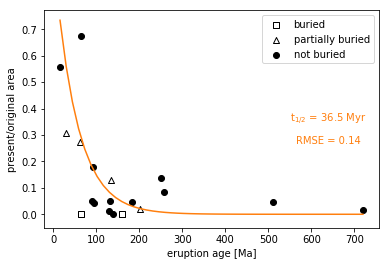

In [82]:
# plot
fig, ax = plt.subplots()

plot_x = np.linspace(np.min(clean_summary['age']), np.max(clean_summary['age']))
plot_y = func(plot_x, *popt)

ax.scatter(buried['age'], buried['present/original'],
           marker='s', edgecolor='k', facecolor='w', label='buried')
ax.scatter(partial['age'], partial['present/original'],
           marker='^', edgecolor='k', facecolor='w', label='partially buried')
ax.scatter(clean_summary['age'], clean_summary['present/original'],
           marker='o', edgecolor='k', facecolor='k', label='not buried')
ax.plot(plot_x, plot_y, c='C1')
ax.set_xlabel('eruption age [Ma]')
ax.set_ylabel('present/original area')
ax.legend(loc='upper right')

ax.text(0.85,0.5,'t$_{1/2}$ = ' + str(np.round(popt[0],1)) + ' Myr', color='C1',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.85,0.4,'RMSE = ' + str(np.round(RMSE,2)), color='C1',
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

#plt.savefig('../Manuscript/Figures/LIP_Preservation.pdf', bbox_inches='tight')
plt.show(fig)

### Leave one out cross-validation

In [83]:
# storage vectors
taus = np.zeros(len(clean_summary))
RMSEs = np.zeros(len(clean_summary))

for i in range(len(clean_summary)):
    
    # get the inds
    inds = np.arange(len(clean_summary))
    inds = inds[inds!=i]
    
    # pull out vectors
    ages_i = clean_summary['age'].values
    ages_i = ages_i[inds]
    
    ratios_i = clean_summary['present/original'].values
    ratios_i = ratios_i[inds]
    
    # fit
    popt_i, pcov_i = curve_fit(func, ages_i, ratios_i, p0=[35])
    predicted_ratios_i = func(ages_i, *popt_i)
    
    # RMSE
    RMSE_i = np.sqrt(mean_squared_error(ratios_i, predicted_ratios_i))
    
    # store
    taus[i] = popt_i[0]
    RMSEs[i] = RMSE_i

mean tau  = 36.22
std tau   = 3.98
mean RMSE = 0.14
std RMSE  = 0.02


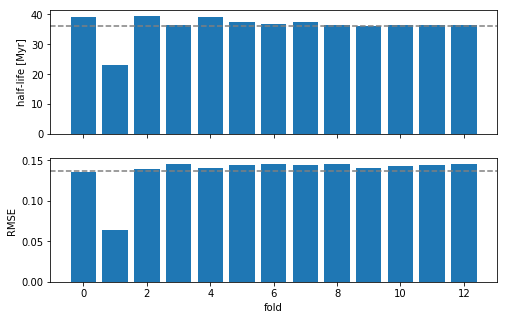

In [84]:
print('mean tau  = {:.2f}'.format(np.mean(taus)))
print('std tau   = {:.2f}'.format(np.std(taus)))
print('mean RMSE = {:.2f}'.format(np.mean(RMSEs)))
print('std RMSE  = {:.2f}'.format(np.std(RMSEs)))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharex=True)

ax[0].bar(np.arange(len(taus)), taus)
ax[0].set_ylabel('half-life [Myr]')
ax[0].axhline(np.mean(taus), ls='--', c='C7')

ax[1].bar(np.arange(len(RMSEs)), RMSEs)
ax[1].set_ylabel('RMSE')
ax[1].axhline(np.mean(RMSEs), ls='--', c='C7')

ax[1].set_xlabel('fold')

plt.show(fig)

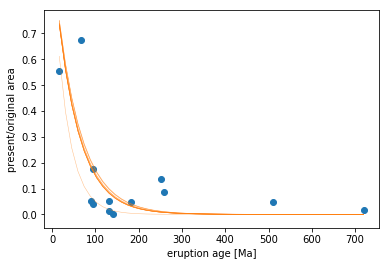

In [85]:
fig, ax = plt.subplots()

ax.scatter(clean_summary['age'], clean_summary['present/original'], c='C0')
ax.set_xlabel('eruption age [Ma]')
ax.set_ylabel('present/original area')

plot_x = np.linspace(np.min(clean_summary['age']), np.max(clean_summary['age']))

for i in range(len(taus)):
    ax.plot(plot_x, func(plot_x, taus[i]), lw=0.5, alpha=0.5, c='C1')

plt.show(fig)

### Bootstrap

In [86]:
# storage vectors
BS_taus = np.array([])
BS_RMSEs = np.array([])

N = 1000
np.random.seed(22)

for i in range(N):
    
    # get the inds
    inds = np.random.choice(np.arange(len(clean_summary)), size=9, replace=False)
    
    # pull out vectors
    ages_i = clean_summary['age'].values
    ages_i = ages_i[inds]
    
    ratios_i = clean_summary['present/original'].values
    ratios_i = ratios_i[inds]
    
    # fit
    popt_i, pcov_i = curve_fit(func, ages_i, ratios_i, p0=[35])
    predicted_ratios_i = func(ages_i, *popt_i)
    
    # RMSE
    RMSE_i = np.sqrt(mean_squared_error(ratios_i, predicted_ratios_i))
    
    # store
    BS_taus = np.append(BS_taus, popt_i[0])
    BS_RMSEs = np.append(BS_RMSEs, RMSE_i)

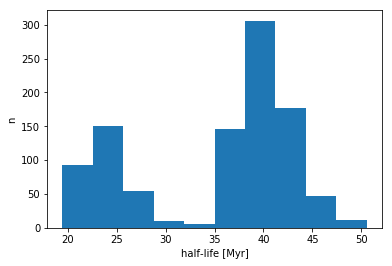

In [87]:
fig, ax = plt.subplots()

ax.hist(BS_taus)
ax.set_xlabel('half-life [Myr]')
ax.set_ylabel('n')

plt.show(fig)

### Exponential fit to individual LIPs

$$
\tau = \frac{-t \ln 2}{\ln \frac{N(t)}{N_{0}}}
$$

In [88]:
LIP_taus = (-clean_summary['age'] * np.log(2)) / (np.log(clean_summary['present/original']))

/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [89]:
clean_summary['half-lives'] = LIP_taus
clean_summary

,name,type,age,age ref.,original area km2,present area km2,present area ref.,present/original,buried,half-lives
0,Columbia River,basaltic,16.3,Kasbohm and Schoene (2018),6.764210e+05,375545,Buchan and Ernst (2004),0.555194,no,19.200515
1,Deccan,basaltic,66.0,Schoene et al. (2014),8.311900e+05,561434,Coffin et al. (2006),0.675458,no,116.595043
2,Madagascar,basaltic,90.0,Cucciniello (2010),6.270722e+05,31289,Coffin et al. (2006),0.049897,no,20.809710
3,Caribbean-Colombian,basaltic,94.0,Loewen et al. (2013),7.122517e+05,126149,Coffin et al. (2006),0.177113,no,37.641278
4,HALIP,basaltic,95.0,Kingsbury et al. (2018),3.597497e+06,149571,Moosdorf and Hartmann (2015),0.041576,no,20.705779
5,EQUAMP,basaltic,131.0,Hollanda et al. (2016),6.602910e+05,7908,Hollanda et al. (2016),0.011977,no,20.521191
6,Bunbury,basaltic,132.0,Zhu et al. (2009),3.164966e+04,1636,Thorne et al. (2014),0.051691,no,30.884811
7,Trap,basaltic,140.0,Ernst and Buchan (2001),2.969846e+04,0,Ernst and Buchan (2001),0.000000,no,0.000000
8,Karoo,basaltic,183.0,Burgess et al. (2015),3.206784e+06,149049,de Kock compilation,0.046479,no,41.334741
9,Siberia,basaltic,252.0,Burgess and Bowring (2015),3.459274e+06,469523,Coffin et al. (2006),0.135729,no,87.463505


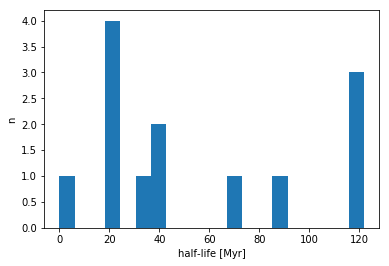

In [90]:
fig, ax = plt.subplots()

ax.hist(LIP_taus, bins=20)
ax.set_xlabel('half-life [Myr]')
ax.set_ylabel('n')

plt.show(fig)

## Output Table

In [91]:
output = summary[summary['age']<=720].copy()
output = output[~((output['age']<720)&(output['age']>520))].copy()

output['half-life'] = np.round((-output['age'] * np.log(2)) / (np.log(output['present/original'])),1)
output['age'] = np.round(output['age'])
output['original area Mm2'] = np.round(output['original area km2']/1e6,2)
output['present area Mm2'] = np.round((output['present area km2']/1e6).astype(np.float64),2)
output['present/original'] = np.round(output['present/original'],2)

cols = ['name',
        'age',
        'age ref.',
        'original area Mm2',
        'present area Mm2',
        'present area ref.',
        'present/original',
        'half-life',
        'buried']

output = output[cols]
output.reset_index(drop=True, inplace=True)

output

/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,name,age,age ref.,original area Mm2,present area Mm2,present area ref.,present/original,half-life,buried
0,Columbia River,16.0,Kasbohm and Schoene (2018),0.68,0.38,Buchan and Ernst (2004),0.56,19.2,no
1,Afar,30.0,Courtillot and Renne (2003),2.05,0.63,Coffin et al. (2006),0.31,17.7,partial
2,NAIP,62.0,Larsen et al. (2015),1.07,0.29,"Buchan and Ernst (2004), Coffin et al. (2006)",0.27,33.0,partial
3,Deccan,66.0,Schoene et al. (2014),0.83,0.56,Coffin et al. (2006),0.68,116.6,no
4,Seychelles,66.0,Schoene et al. (2014),0.46,0.00,Coffin et al. (2006),0.00,0.0,yes
5,Madagascar,90.0,Cucciniello (2010),0.63,0.03,Coffin et al. (2006),0.05,20.8,no
6,Caribbean-Colombian,94.0,Loewen et al. (2013),0.71,0.13,Coffin et al. (2006),0.18,37.6,no
7,HALIP,95.0,Kingsbury et al. (2018),3.60,0.15,Moosdorf and Hartmann (2015),0.04,20.7,no
8,EQUAMP,131.0,Hollanda et al. (2016),0.66,0.01,Hollanda et al. (2016),0.01,20.5,no
9,Comei,132.0,Zhu et al. (2009),0.11,NaN,n/a,NaN,NaN,no


In [92]:
output.to_csv('../Manuscript/Figures/LIP_Table.csv', index=False)

In [93]:
with open('../Manuscript/Figures/LIP_Table.tex','w') as texfile:
    texfile.write(output.to_latex(bold_rows=True, index=False))